Shape of data :  (1000, 1)


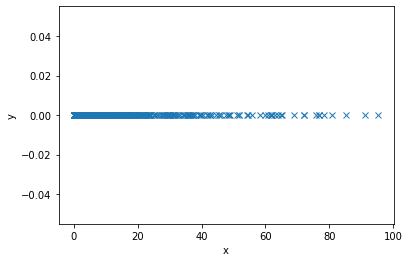

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
# Using random and softmax to generate random numbers
import random
from scipy.special import softmax

df=pd.read_csv('A2Q1.csv', sep=',',header=None)
data = df.values
print("Shape of data : ", np.shape(data))

val = 0. 
arr = data 
plt.plot(arr, np.zeros_like(arr) + val, 'x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

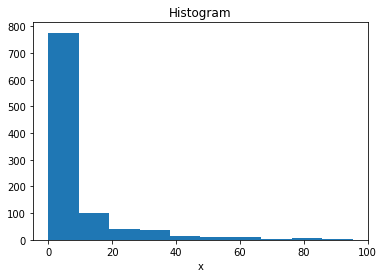

In [ ]:
x = data
plt.hist(x)
plt.xlabel('x')
plt.title('Histogram')
plt.show() 

In [ ]:
X = np.reshape(data, (1000, ))
print(np.shape(X))

(1000,)


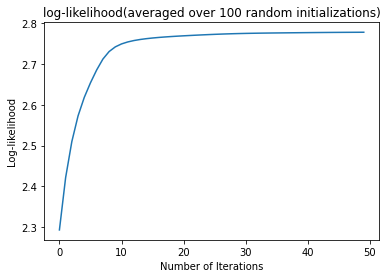

In [ ]:
class GMM:
  def __init__(self, X, iterations):
    self.iterations = iterations
    self.X = X
    self.mu = None
    self.pi = None
    self.sigma = None

  def fit(self):

    likelihoods = np.zeros(self.iterations)

    for iter in range(100):

        # Random Initialization of pi
        nums = []
        for i in range(4):
          nums.append(random.uniform(0.1, 1))
        self.pi = softmax(nums)

        # Random Initialization of mu
        self.mu = []
        for i in range(4):
          self.mu.append(random.uniform(10, 60))
          
        # Random Initialization of sigma
        self.sigma = []
        for i in range(4):
          self.sigma.append(random.uniform(10, 80))

        log_likelihoods = np.zeros(self.iterations)

        for iteration in range(self.iterations):

          lamda = np.zeros((len(X), 4))

          for j, k, l in zip(range(4),[norm(loc=self.mu[0],scale=self.sigma[0]), norm(loc=self.mu[1],scale=self.sigma[1]), norm(loc=self.mu[2],scale=self.sigma[2]), norm(loc=self.mu[3],scale=self.sigma[3])],self.pi):
            lamda[:,j] = l*k.pdf(X)  

          for i in range(len(lamda)):
            lamda[i] = lamda[i]/(np.sum(self.pi)*np.sum(lamda,axis=1)[i])



          M = []

          for x in range(len(lamda[0])):
            m = np.sum(lamda[:,x])
            M.append(m) 

          for y in range(len(M)):
            self.pi[y] = (M[y]/np.sum(M)) 

          self.mu = np.sum(self.X.reshape(len(self.X),1)*lamda,axis=0)/M
          
          sigmas = []

          for z in range(len(lamda[0])):
            sigmas.append((1/M[z])*np.dot(((np.array(lamda[:,z]).reshape(1000,1))*(self.X.reshape(len(self.X),1)-self.mu[z])).T,(self.X.reshape(len(self.X),1)-self.mu[z])))

          log_likelihoods[iteration] = np.log(np.sum([k*norm(self.mu[i],self.sigma[j]).pdf(X) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.sigma)))]))


        likelihoods = likelihoods + log_likelihoods

    return likelihoods/100

instance = GMM(X, 50)
val = instance.fit()
plt.xlabel("Number of Iterations")
plt.ylabel("Log-likelihood")
plt.title("log-likelihood(averaged over 100 random initializations)")  
plt.plot(val)            